In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 전기차 여부
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 12264, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 12264 (delta 18), reused 22 (delta 13), pack-reused 12229
Receiving objects: 100% (12264/12264), 11.99 MiB | 7.08 MiB/s, done.
Resolving deltas: 100% (8488/8488), done.


In [ ]:
!pip install -U -r yolov5/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 24.3 MB/s 
     |████████████████████████████████| 60.9 MB 1.2 MB/s 
     |████████████████████████████████| 3.1 MB 61.8 MB/s 
     |████████████████████████████████| 596 kB 50.3 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 1.0 MB 65.6 MB/s 
     |████████████████████████████████| 5.8 MB 53.9 MB/s 
     |████████████████████████████████| 793 kB 51.9 MB/s 
     |████████████████████████████████| 281 kB 77.3 MB/s 
     |████████████████████████████████| 930 kB 55.3 MB/s 
     |████████████████████████████████| 1.1 MB 62.5 MB/s 
     |████████████████████████████████| 381 kB 70.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled r

In [ ]:
# 번호판 인식
!sudo apt install tesseract-ocr
!pip install pytesseract
!sudo apt install tesseract-ocr-kor

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,069 kB/s)
debconf: unable to initi

In [ ]:
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 6.5 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
from PIL import Image
plt.style.use('dark_background')

#파이토치 버전 확인, cuda device properties 확인
print('torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

torch 1.11.0+cu113 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


In [ ]:
#학습데이터 다운
!curl -L "https://app.roboflow.com/ds/1AXjT3E2Yj?key=A5z4jZN9vs" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0   1946      0 --:--:-- --:--:-- --:--:--  1946
100 2187k  100 2187k    0     0  1330k      0  0:00:01  0:00:01 --:--:-- 2240k
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/-------_JPG.rf.268c51995a7b58febcc0cddb87129e41.jpg  
 extracting: test/images/-----_JPG.rf.ada5d1b42ace00c6b6c6fca25d4637a1.jpg  
 extracting: test/images/EV02-1867-7_jpg.rf.2a8973079c905ed6a55fbc1bbfc3ad06.jpg  
 extracting: test/images/EV02-3851-4_jpg.rf.2e8105ebd6e31fcd74b88aec2e75ca7f.jpg  
 extracting: test/images/EV29-2013_jpg.rf.b601c8fe02bc1773225c32411745e842.jpg  
 extracting: test/images/EV29-5254-3_jpg.rf.3339ecf81b56a1ef15c607dc3fac7c04.jpg  
 extracting: tes

In [ ]:
from glob import glob

# 이미지 경로 list로 넣기
train_img_list = glob('../train/images/*.jpg') + glob('../train/images/*.jpeg')
valid_img_list = glob('../valid/images/*.jpg') + glob('../valid/images/*.jpeg')


# txt 파일에 write
with open('/content/train.txt', 'w') as f:f.write('\n'.join(train_img_list) + '\n')
    
with open('/content/valid.txt', 'w') as f:f.write('\n'.join(valid_img_list) + '\n')

In [ ]:
!python /content/yolov5/train.py --img 320 --batch 8 --epochs 200 --data /content/data.yaml --weights yolov5s.pt --name result_data --cfg /content/yolov5/models/yolov5s.yaml

train: weights=yolov5s.pt, cfg=/content/yolov5/models/yolov5s.yaml, data=/content/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=8, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=result_data, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-253-g75bbaa8 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_

In [ ]:
!python /content/yolov5/detect.py --weight /content/yolov5/runs/train/result_data5/weights/best.pt --data /content/data.yaml  --img 320 --conf 0.5 --source /content/1.JPG

detect: weights=['/content/yolov5/runs/train/result_data5/weights/best.pt'], source=/content/1.JPG, data=/content/data.yaml, imgsz=[320, 320], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-253-g75bbaa8 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7012822 parameters, 0 gradients
image 1/1 /content/1.JPG: 160x320 Done. (0.013s)
Speed: 0.2ms pre-process, 13.2ms inference, 0.3ms NMS per image at shape (1, 3, 320, 320)
Results saved to yolov5/runs/detect/exp15


In [ ]:
!cp -r /content /content/drive/MyDrive/models

cp: cannot copy a directory, '/content', into itself, '/content/drive/MyDrive/models/content'


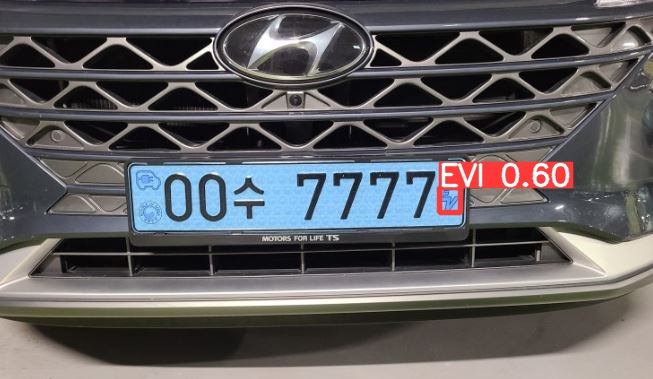

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/yolov5/runs/detect/exp4/123.jpg')
cv2_imshow(img)